<center><h1><Strong><i>Laptop Price Predictor</i></strong></h1>

<center><h2>Author: Muhammad Taimoor Khan</h2>

### 1. Importing Dependencies

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
df = pd.read_csv('./data/laptop_data.csv')
print("The dataset have been read.")

The dataset have been read.


### 2. Data Preprocessing

In [178]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [179]:
df.shape

(1303, 12)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [181]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [182]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [183]:
df.duplicated().sum()

29

In [184]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<code> No Missing Values in the Dataset. </code>

In [185]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [186]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [187]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Let's convert the price of the laptops into USD for better generalization

In [189]:
df['Price'] = df['Price'] * 0.012
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696


### 3. Data Analysis

In [190]:
import seaborn as sns

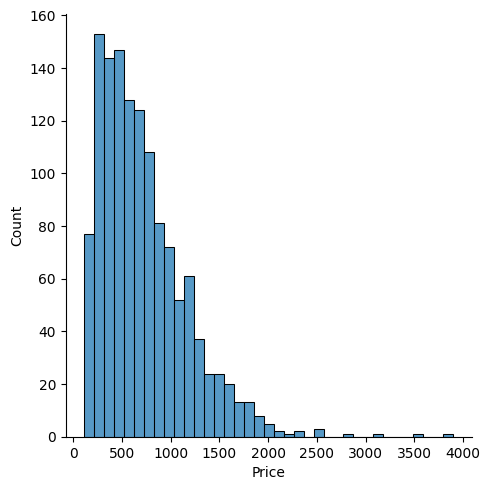

In [191]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

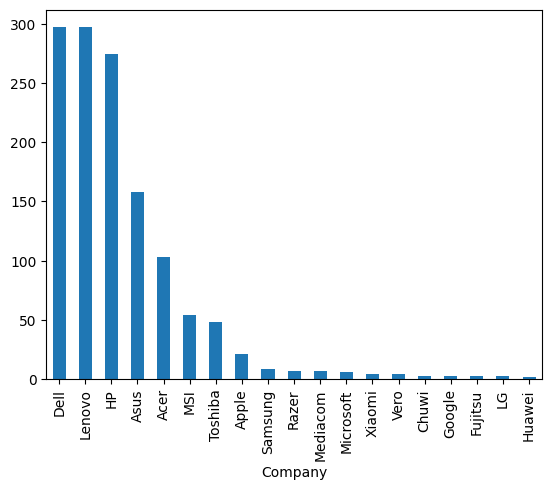

In [192]:
df['Company'].value_counts().plot(kind='bar')

<code> We can see that Dell and Lenovo are the top selling brands. </code>

<function matplotlib.pyplot.show(close=None, block=None)>

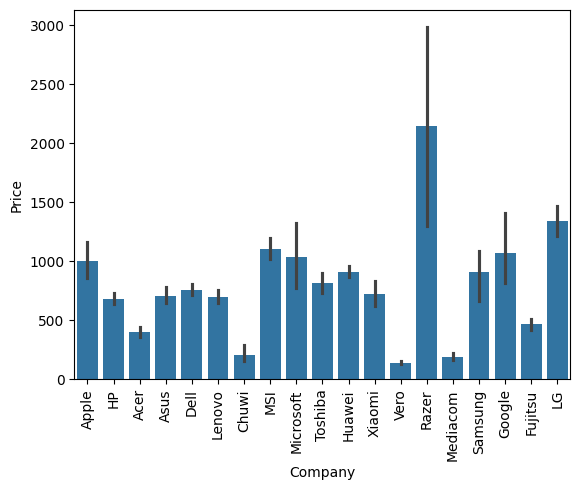

In [193]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show

<code> We observe, Razer is the most expensive brand while Vero and Chuwi are the cheapest with HP, Acer, Asus, Dell, and Lenovo are the budget-range laptops. </code>

<Axes: xlabel='TypeName'>

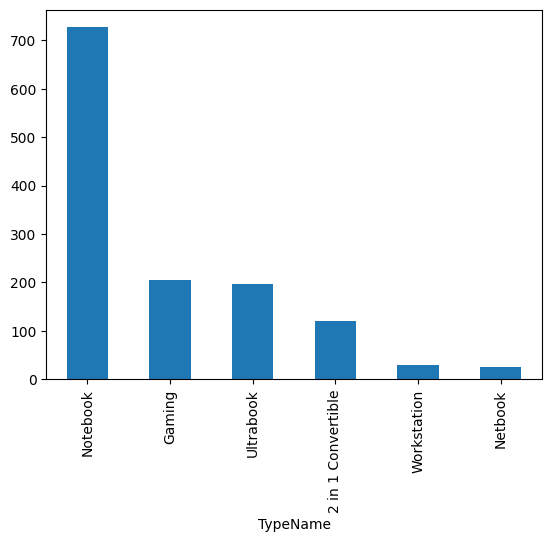

In [194]:
df['TypeName'].value_counts().plot(kind='bar')

<code> We observe, Notebooks are the top-selling Laptop Type and Netbooks are the worst-selling ones. </code>

<function matplotlib.pyplot.show(close=None, block=None)>

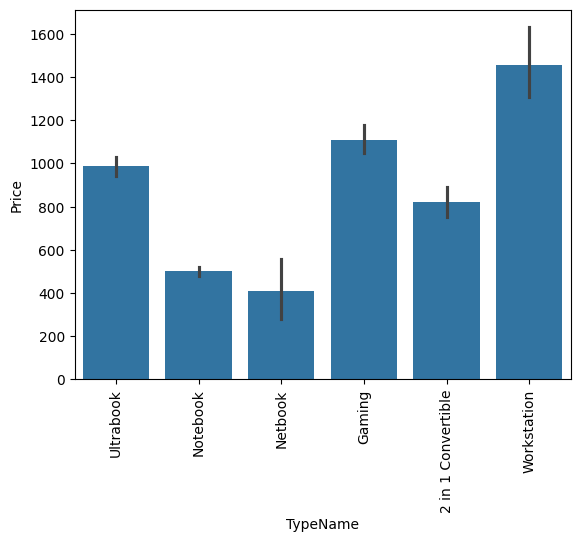

In [195]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show

<code> We can observe from the graph that workstations are the most pricey ones while Netbooks are the cheapest Laptop Type. </code>

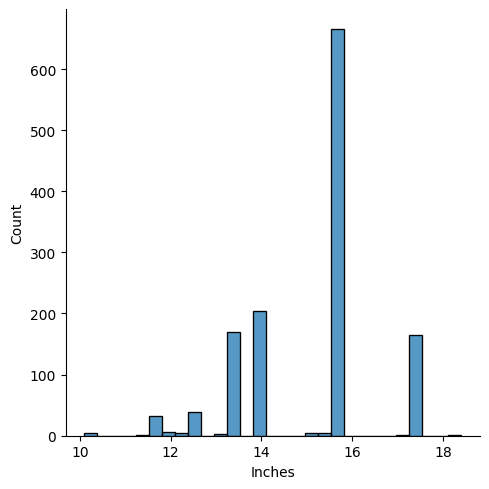

In [196]:
sns.displot(df['Inches'])

<code> 15" Screen Size Laptops are the top-selling </code>

<Axes: xlabel='Inches', ylabel='Price'>

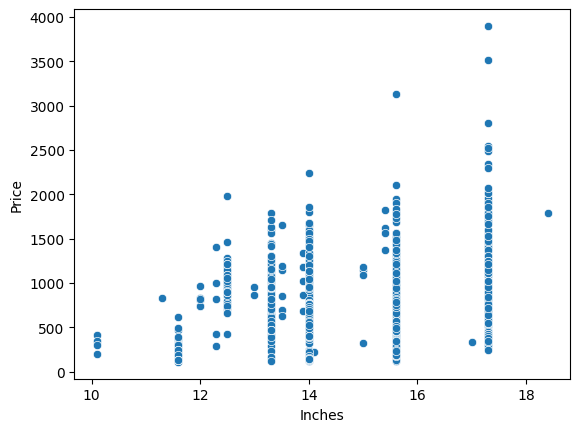

In [197]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

<code> We observe that as the size of the screen is increasing the price is also increasing. Although, the relationship between price and screen size is not very strong. </code>

In [198]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Performing feature engineering to check whether the laptops are touchscreen or not.

In [199]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [200]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0


In [201]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
923,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,1262.73600,0
312,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,1342.01664,0
26,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,702.65664,0
988,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,478.88064,0
512,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,534.50496,0


<Axes: xlabel='Touchscreen'>

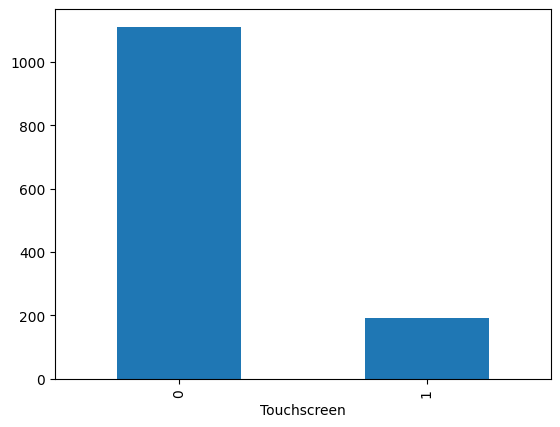

In [202]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

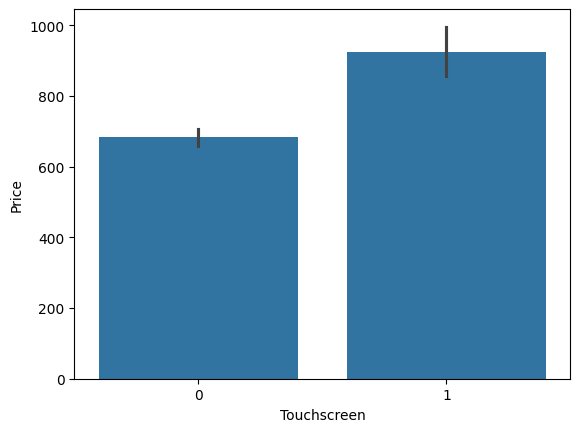

In [203]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

<code> Clearly we can see that the laptops which have touchscreen are more expensive than the ones which does not have touchscreen. </code>

In [204]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [205]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
178,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,AMD R17M-M1-70,Windows 10,1.90,519.799680,0,0
1136,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M3000M,Windows 7,3.00,2525.088384,0,1
1287,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,488.471040,0,0
639,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,1533.824640,1,0
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,127.232640,0,0


<Axes: xlabel='Ips'>

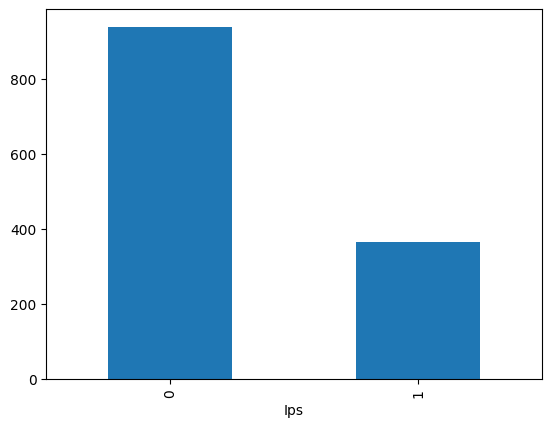

In [206]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

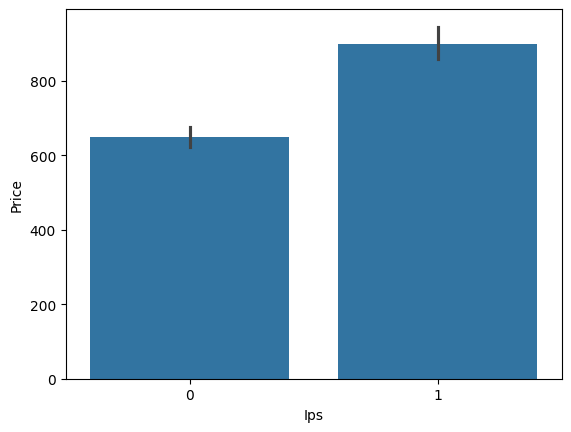

In [207]:
sns.barplot(x=df['Ips'], y=df['Price'])

<code> Clearly we can see that the laptops which have IPS display are more expensive than the ones which does not have IPS display. </code>

In [208]:
new_df = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [209]:
df['X_res'] = new_df[0]
df['Y_res'] = new_df[1]

In [210]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,IPS Panel Retina Display 2560,1600


In [211]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [212]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,2560,1600


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [214]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [216]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
correlation_result = df[numeric_columns].corr()['Price']
print(correlation_result)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [217]:
df['Ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  Ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [218]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
correlation_result = df[numeric_columns].corr()['Price']
print(correlation_result)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Ppi            0.473487
Name: Price, dtype: float64


In [219]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [220]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [221]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005


In [222]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [223]:
df['CpuName'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [224]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5


In [225]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5


In [226]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [227]:
df['CpuBrand'] = df['CpuName'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuName,CpuBrand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CpuBrand'>

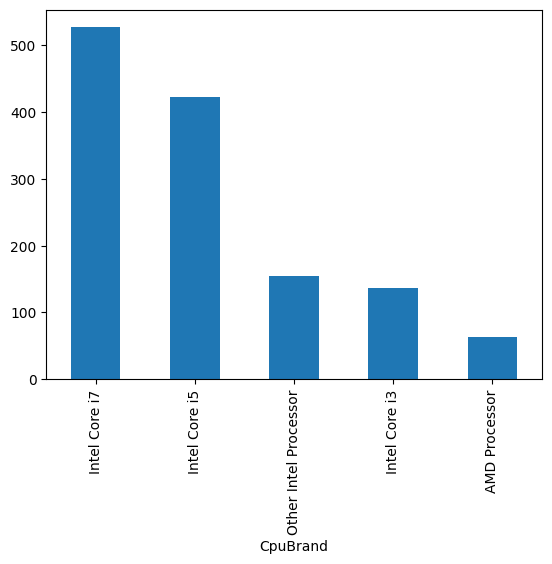

In [228]:
df['CpuBrand'].value_counts().plot(kind="bar")

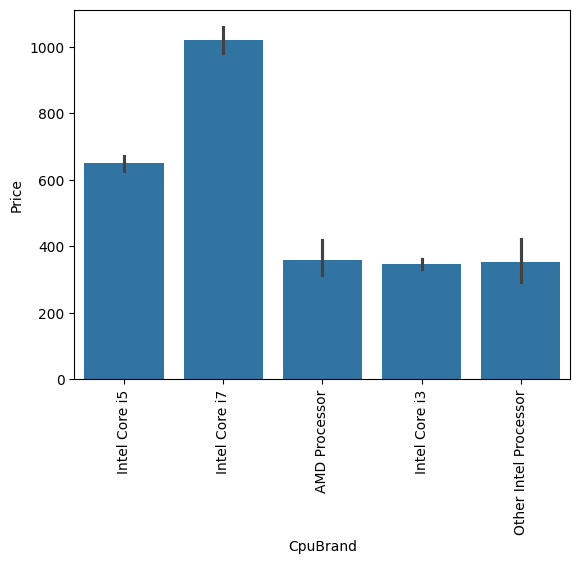

In [229]:
sns.barplot(x=df['CpuBrand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [230]:
df.drop(columns=['Cpu','CpuName'],inplace=True)

In [231]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

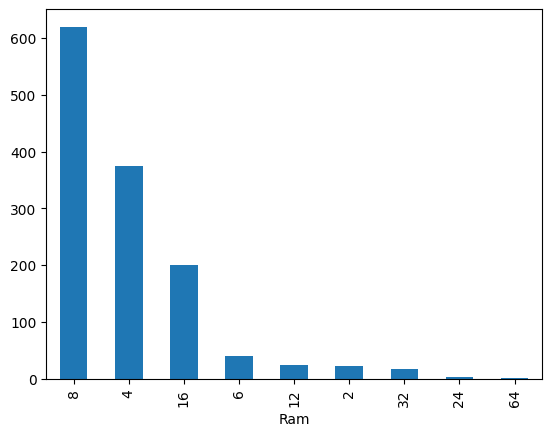

In [232]:
df['Ram'].value_counts().plot(kind='bar')

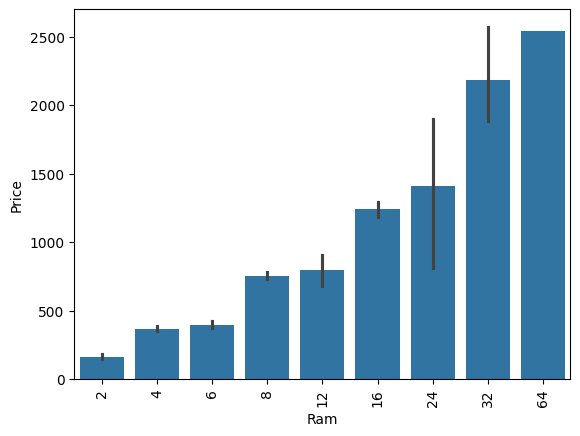

In [233]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [234]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [239]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column into 'first' and 'second'
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0").str.strip()

# Define functions to extract storage type and size
def extract_size(s):
    return int(''.join(filter(str.isdigit, s)))

def extract_storage_type(s, storage_type):
    return 1 if storage_type in s else 0

# Apply the functions to create new columns
df["first_size"] = df["first"].apply(extract_size)
df["second_size"] = df["second"].apply(extract_size)

storage_types = ["HDD", "SSD", "Hybrid", "Flash Storage"]
for storage_type in storage_types:
    df[f"Layer1{storage_type}"] = df["first"].apply(lambda x: extract_storage_type(x, storage_type))
    df[f"Layer2{storage_type}"] = df["second"].apply(lambda x: extract_storage_type(x, storage_type))

# Calculate total size for each storage type
for storage_type in storage_types:
    df[storage_type] = df[f"first_size"] * df[f"Layer1{storage_type}"] + df[f"second_size"] * df[f"Layer2{storage_type}"]

# Drop intermediate and unnecessary columns
df.drop(columns=['first', 'second', 'first_size', 'second_size'] + [f"Layer1{storage_type}" for storage_type in storage_types] + [f"Layer2{storage_type}" for storage_type in storage_types], inplace=True)

In [244]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,Capacity_GB,HDD,SSD,Hybrid,Flash Storage
675,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,827.331840,0,0,141.211998,Intel Core i7,256,1000,256,0,0
198,HP,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,881.677440,0,1,127.335675,Intel Core i7,256,1000,256,0,0
1066,Asus,Gaming,64,1000 SSD,Nvidia GeForce GTX 980,Windows 10,3.58,2541.456000,0,1,127.335675,Intel Core i7,1,0,1000,0,0
1074,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.30,1095.536966,1,1,176.232574,Intel Core i7,256,0,256,0,0
1242,Acer,Notebook,4,500 HDD,Intel HD Graphics 520,Linux,2.40,231.320448,0,0,100.454670,Intel Core i3,500,500,0,0,0
336,Dell,Ultrabook,8,128 SSD + 1000 HDD,Nvidia GeForce 940MX,Windows 10,1.90,670.688640,0,1,141.211998,Intel Core i5,128,1000,128,0,0
809,Lenovo,Notebook,4,1000 HDD,Nvidia GeForce 920M,Windows 10,2.40,389.370240,0,0,141.211998,Intel Core i5,1,1000,0,0,0
1168,HP,Notebook,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.44,159.200640,0,0,111.935204,Other Intel Processor,32,0,0,0,32
721,HP,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.58,534.888576,1,1,117.826530,Intel Core i5,256,0,256,0,0
1040,Lenovo,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 520,Windows 10,1.80,541.537920,1,1,141.211998,Intel Core i7,256,0,256,0,0


In [245]:
df.drop(columns=['Memory','Capacity_GB'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,0,0


In [246]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
correlation_result = df[numeric_columns].corr()['Price']
print(correlation_result)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
Ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64


In [248]:
df.drop(columns=['Hybrid','Flash Storage'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256


In [249]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [256]:
df['GpuBrand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [258]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel


In [259]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [260]:
df = df[df['GpuBrand'] != 'ARM']

In [262]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

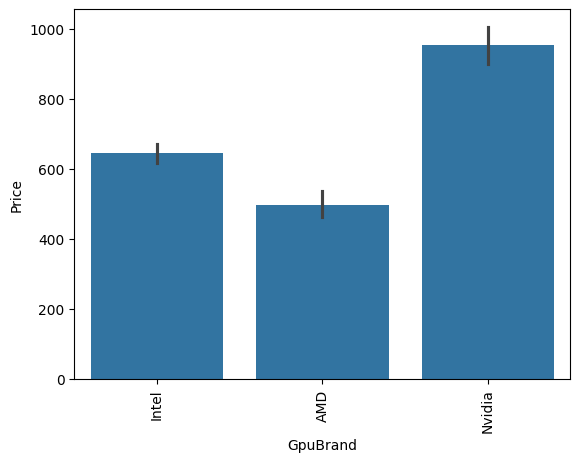

In [264]:
sns.barplot(x=df['GpuBrand'], y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [265]:
df.drop(columns=['Gpu'], inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel


In [266]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

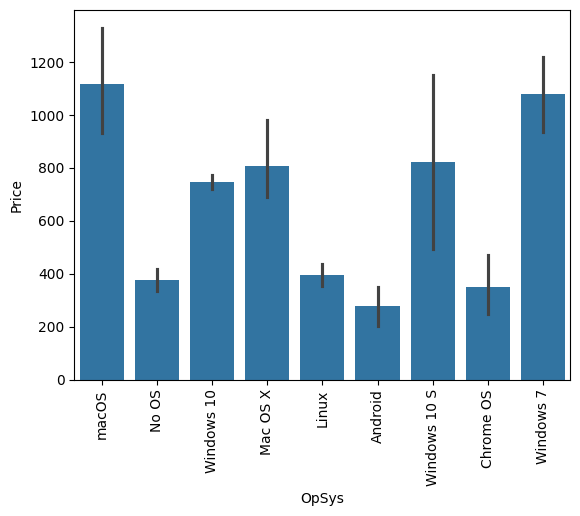

In [267]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [269]:
def catch_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or  inp == "Windows 10 S":
        return "Windows"
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux' 

In [270]:
df['os'] = df['OpSys'].apply(catch_os)

In [271]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [272]:
df.drop(columns=['OpSys'], inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


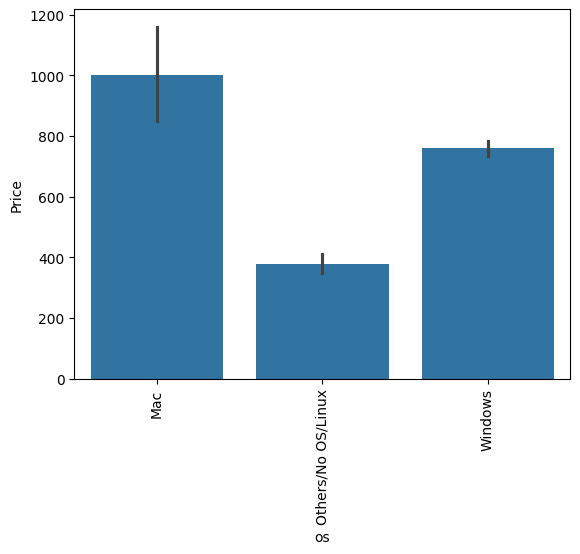

In [273]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

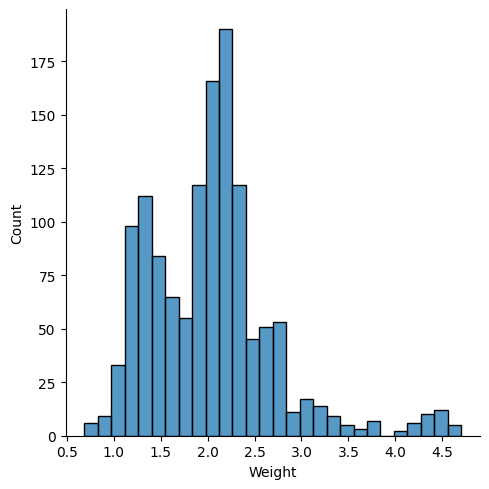

In [274]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

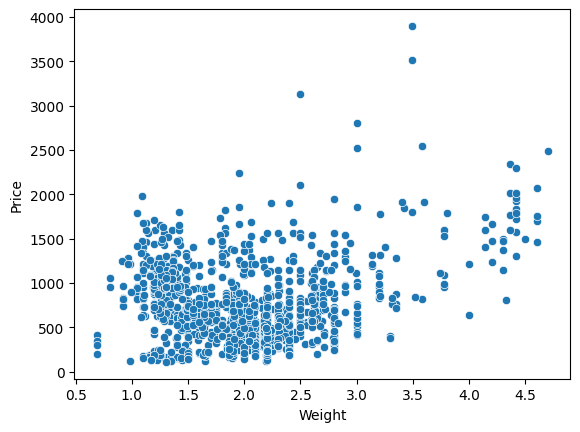

In [275]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [277]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
correlation_result = df[numeric_columns].corr()
print(correlation_result)

                  Ram    Weight     Price  Touchscreen       Ips       Ppi  \
Ram          1.000000  0.383362  0.742905     0.118875  0.207949  0.305688   
Weight       0.383362  1.000000  0.209867    -0.293004  0.018643 -0.321883   
Price        0.742905  0.209867  1.000000     0.192917  0.253320  0.475368   
Touchscreen  0.118875 -0.293004  0.192917     1.000000  0.148026  0.458571   
Ips          0.207949  0.018643  0.253320     0.148026  1.000000  0.299142   
Ppi          0.305688 -0.321883  0.475368     0.458571  0.299142  1.000000   
HDD          0.095808  0.514147 -0.096891    -0.208766 -0.093588 -0.294698   
SSD          0.603379 -0.063818  0.670660     0.257577  0.225311  0.509437   

                  HDD       SSD  
Ram          0.095808  0.603379  
Weight       0.514147 -0.063818  
Price       -0.096891  0.670660  
Touchscreen -0.208766  0.257577  
Ips         -0.093588  0.225311  
Ppi         -0.294698  0.509437  
HDD          1.000000 -0.400750  
SSD         -0.400750  1.

<Axes: >

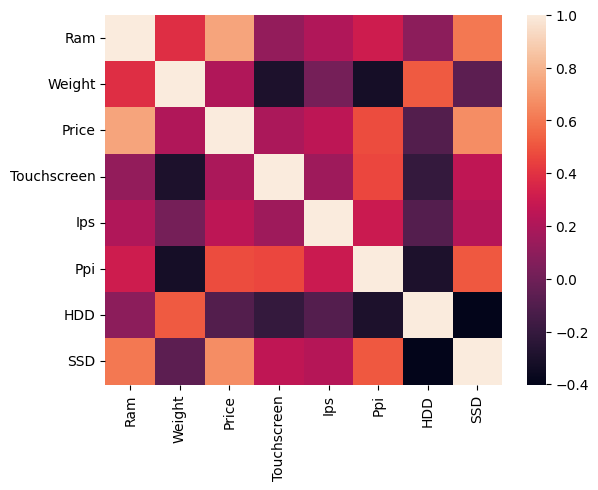

In [278]:
sns.heatmap(correlation_result)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_16884\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

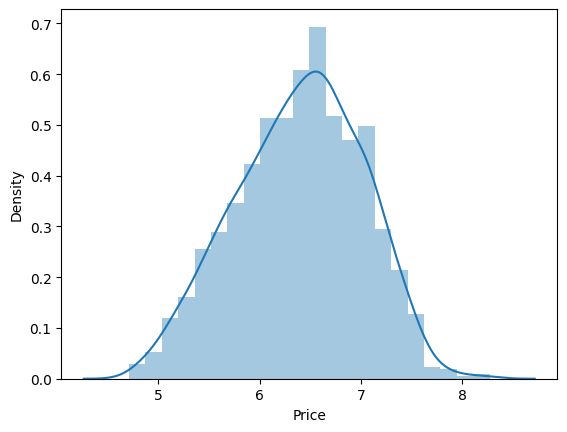

In [280]:
sns.distplot(np.log(df['Price']))

### 4. Model Training

In [281]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [282]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [283]:
y

0       6.752906
1       6.353929
2       5.907082
3       7.391627
4       7.050252
          ...   
1298    6.011051
1299    6.865266
1300    4.986434
1301    6.191280
1302    5.463509
Name: Price, Length: 1302, dtype: float64

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size = 0.5, random_state = 2)

In [285]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,os
304,Asus,Gaming,8,2.50,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
36,Acer,Notebook,4,2.10,0,0,100.454670,Intel Core i3,1000,0,Intel,Others/No OS/Linux
42,Asus,Notebook,8,2.30,0,0,100.454670,Intel Core i5,1000,0,Nvidia,Others/No OS/Linux
675,MSI,Gaming,16,2.40,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows
1025,HP,Ultrabook,4,1.26,0,0,125.367428,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [300]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### _Linear Regression_

In [296]:
col_transformer = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(
    steps=[
        ('column_transformer', col_transformer),
        ('linear_regression', LinearRegression())
    ]
)

# Train the model
pipeline.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print('R2 score', r2_score(Y_test, y_pred))
print('MAE', mean_absolute_error(Y_test, y_pred))

R2 score 0.8049669067201469
MAE 0.21265317757222352


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Ridge Regression_

In [303]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8002633446167995
MAE 0.21840130665159704


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Lasso Regression_

In [307]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8037800740647801
MAE 0.21529579948837174


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _KNN_

In [308]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score 0.7356645061184051
MAE 0.22698819823469207


### _Decision Tree_

In [310]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.7923676981126204
MAE 0.21475949770631877


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Support Vector Machines_

In [312]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8120873409683691
MAE 0.20875034242514262


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Random Forrest Regressor_

In [313]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8646877111234539
MAE 0.17630480794571002


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _ExtraTrees_

In [316]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8589008784982293
MAE 0.17597206151367367


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _AdaBoost_

In [317]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.7785993160380238
MAE 0.23446617362127214


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Gradient Boost_

In [318]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8790963427994283
MAE 0.16370084524237147


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _XG Boost_

In [319]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8587411151380693
MAE 0.17202517985694127


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Voting Regressor_

In [322]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8681860852243171
MAE 0.17407413253732676


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### _Stacking Regressor_

In [324]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,7,10,11])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8563539753422
MAE 0.18674061958507343


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Exporting The Model

In [325]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [326]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,407.911680,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,958.400640,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,146.413440,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,488.471040,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [327]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Ppi,CpuBrand,HDD,SSD,GpuBrand,os
304,Asus,Gaming,8,2.50,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
36,Acer,Notebook,4,2.10,0,0,100.454670,Intel Core i3,1000,0,Intel,Others/No OS/Linux
42,Asus,Notebook,8,2.30,0,0,100.454670,Intel Core i5,1000,0,Nvidia,Others/No OS/Linux
675,MSI,Gaming,16,2.40,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows
1025,HP,Ultrabook,4,1.26,0,0,125.367428,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
